<a href="https://colab.research.google.com/github/Hari25483/ARM-Programming/blob/main/MFRC_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load pandas
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv('/content/final_mfrc_data.csv')

# Show dataframe
df

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident
...,...,...,...,...,...,...
61219,Well I can discern from your vehemence toward ...,AmItheAsshole,Everyday Morality,annotator05,Equality,Confident
61220,Kick! Punch! It's all in the mind. If you wann...,nostalgia,Everyday Morality,annotator05,Thin Morality,Somewhat Confident
61221,Reddit can’t help you this is some seriously t...,confession,Everyday Morality,annotator05,Thin Morality,Confident
61222,Yes. Disordered eating is insidious. And Rita ...,AmItheAsshole,Everyday Morality,annotator05,Non-Moral,Somewhat Confident


In [2]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_result = mlb.fit_transform([str(df.loc[i,'annotation']).split(',') for i in range(len(df))])
df_final = pd.concat([df['text'],pd.DataFrame(mlb_result,columns=list(mlb.classes_))],axis=1)

In [3]:
df_final

,text,Authority,Care,Confident,Equality,Loyalty,Non-Moral,Not Confident,Proportionality,Purity,Somewhat Confident,Thin Morality
0,That particular part of the debate is especial...,0,0,0,0,0,1,0,0,0,0,0
1,That particular part of the debate is especial...,0,0,0,0,0,0,0,0,1,0,0
2,That particular part of the debate is especial...,0,0,0,0,0,0,0,0,0,0,1
3,"/r/france is pretty lively, with it's own ling...",0,0,0,0,0,1,0,0,0,0,0
4,"/r/france is pretty lively, with it's own ling...",0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61219,Well I can discern from your vehemence toward ...,0,0,0,1,0,0,0,0,0,0,0
61220,Kick! Punch! It's all in the mind. If you wann...,0,0,0,0,0,0,0,0,0,0,1
61221,Reddit can’t help you this is some seriously t...,0,0,0,0,0,0,0,0,0,0,1
61222,Yes. Disordered eating is insidious. And Rita ...,0,0,0,0,0,1,0,0,0,0,0


In [4]:
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [6]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Multi Label Pkgs
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
df_final.loc[0].text


'That particular part of the debate is especially funny. Macron was explaining he did not think FN voters were evil and that from where he comes from he knew many, and she was like "ooooh the evil FN invaders they\'re everywhere...!" Self-awareness: zero.'

In [9]:
df_final.dtypes


text                  object
Authority              int64
Care                   int64
Confident              int64
Equality               int64
Loyalty                int64
Non-Moral              int64
Not Confident          int64
Proportionality        int64
Purity                 int64
Somewhat Confident     int64
Thin Morality          int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    56422
1     4802
Name: Authority, dtype: int64

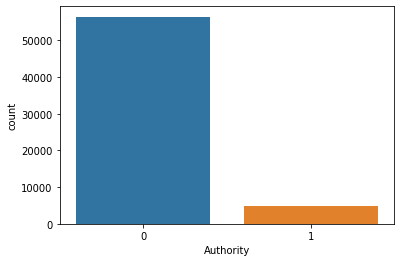

In [10]:
sns.countplot(df_final['Authority'])
df_final['Authority'].value_counts()

In [11]:
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
df_final['text'].apply(lambda x:nt.TextFrame(x).noise_scan())


0        {'text_noise': 13.043478260869565, 'text_lengt...
1        {'text_noise': 13.043478260869565, 'text_lengt...
2        {'text_noise': 13.043478260869565, 'text_lengt...
3        {'text_noise': 11.671087533156498, 'text_lengt...
4        {'text_noise': 11.671087533156498, 'text_lengt...
                               ...                        
61219    {'text_noise': 12.831858407079647, 'text_lengt...
61220    {'text_noise': 16.091954022988507, 'text_lengt...
61221    {'text_noise': 12.612612612612612, 'text_lengt...
61222    {'text_noise': 9.649122807017543, 'text_length...
61223    {'text_noise': 11.11111111111111, 'text_length...
Name: text, Length: 61224, dtype: object

In [13]:
df_final['text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())


0        [that, part, of, the, is, was, he, did, not, w...
1        [that, part, of, the, is, was, he, did, not, w...
2        [that, part, of, the, is, was, he, did, not, w...
3        [is, with, it's, own, that, is, is, or, is, a,...
4        [is, with, it's, own, that, is, is, or, is, a,...
                               ...                        
61219    [well, i, can, from, your, toward, a, what, sh...
61220    [it's, all, in, the, if, you, you'll, the, is,...
61221    [you, this, is, some, he, should, move, to, th...
61222                  [is, and, and, not, the, that, the]
61223                              [what, would, a, a, to]
Name: text, Length: 61224, dtype: object

In [14]:
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [15]:
df_final['text'].apply(nfx.remove_stopwords)


0        particular debate especially funny. Macron exp...
1        particular debate especially funny. Macron exp...
2        particular debate especially funny. Macron exp...
3        /r/france pretty lively, lingo usually deliber...
4        /r/france pretty lively, lingo usually deliber...
                               ...                        
61219    discern vehemence woman wanting thinks equalit...
61220    Kick! Punch! mind. wanna test me, I'm sure fin...
61221    Reddit can’t help seriously traumatic shit ......
61222    Yes. Disordered eating insidious. Rita needs h...
61223                 parent let kid bring Gameboy church?
Name: text, Length: 61224, dtype: object

In [16]:
corpus = df_final['text'].apply(nfx.remove_stopwords)

In [17]:
tfidf = TfidfVectorizer()


In [ ]:
Xfeatures = tfidf.fit_transform(corpus).toarray()


In [ ]:
Xfeatures 

In [ ]:
df_final.head()


In [ ]:
y = df[['mysql', 'python', 'php']]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)


In [ ]:
print(df['title'].shape)
print(X_train.shape)

In [ ]:
### Problem Transform
import skmultilearn

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
